# BOOKS RECOMMENDER SYSTEM

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
books=pd.read_csv('Books.csv')

C:\Users\hamdi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
users=pd.read_csv('Users.csv')

In [4]:
ratings=pd.read_csv('Ratings.csv')

In [5]:
#Exploring data
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Data dimensions
print("books dimension : "+str(books.shape))
print("users dimension : "+str(users.shape))
print("ratings dimension : "+str(ratings.shape))

books dimension : (271360, 8)
users dimension : (278858, 3)
ratings dimension : (1149780, 3)


# BOOKS DATASET

## DATA CLEANING ( BOOKS )

In [9]:
# Renaming books's columns
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [10]:
# Dropping books's last three columns containing image urls which will not be required for analysis
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [11]:
# Data description
books.describe()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0553218735,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [12]:
# Type of books's column
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [13]:
# ISBN's uniqueness
books['ISBN'].is_unique

True

In [14]:
# Find how much null data in each column
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [15]:
# Find out index of null "bookAuthor" 
books[books['bookAuthor'].isnull()].index.tolist()

[187689]

In [16]:
# Find out index of null "publisher" 
books[books['publisher'].isnull()].index.tolist()

[128890, 129037]

In [17]:
books.loc[187689]

ISBN                                                        9627982032
bookTitle            The Credit Suisse Guide to Managing Your Perso...
bookAuthor                                                         NaN
yearOfPublication                                                 1995
publisher                               Edinburgh Financial Publishing
Name: 187689, dtype: object

In [18]:
# Dropping rows containing missing values
#books=books.drop([187689,128890, 129037])

In [19]:
# Find how much null data in each column
#books.isna().sum()

In [20]:
# Extracting data which containing missing values
books.loc[[187689,128890, 129037],:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [21]:
# Checking all data published by 'Edinburgh Financial Publishing'
books.groupby('publisher').get_group('Edinburgh Financial Publishing')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [22]:
# Checking data by 'bookAuthor'
books.groupby('bookAuthor').get_group('Elaine Corvidae')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [23]:
books.groupby('bookAuthor').get_group('Linnea Sinclair')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [24]:
# Checking data by 'bookTitle'
books.groupby('bookTitle').get_group('Tyrant Moon')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [25]:
books.groupby('bookTitle').get_group('Finders Keepers')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [26]:
books.fillna('Other',inplace=True)

In [27]:
# Checking that missing value are replaced 
books.loc[[187689,128890, 129037],:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,Other,1995,Edinburgh Financial Publishing
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,Other
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,Other


In [28]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [29]:
# Find out index of data which are not date
books[books['yearOfPublication']=='DK Publishing Inc'].index.tolist()

[209538, 221678]

In [30]:
books[books['yearOfPublication']=='Gallimard'].index.tolist()

[220731]

In [31]:
books.loc[[209538, 221678,220731],:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [32]:
# Data correction
books.loc[209538,'bookTitle']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[209538,'bookAuthor']='Michael Teitelbaum'
books.loc[209538,'yearOfPublication']=2000
books.loc[209538,'publisher']='DK Publishing Inc'

books.loc[221678,'bookTitle']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[221678,'bookAuthor']='James Buckley'
books.loc[221678,'yearOfPublication']=2000
books.loc[221678,'publisher']='DK Publishing Inc'

books.loc[220731,'bookTitle']='Peuple du ciel, suivi de Les Bergers'
books.loc[220731,'bookAuthor']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[220731,'yearOfPublication']=2003
books.loc[220731,'publisher']='Gallimard'

In [33]:
# Checking corrected data  
books.loc[[209538, 221678,220731],:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [34]:
# Transforming data from object to numeric
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

In [35]:
# Extracting data that have yearOfPublication > 2004 and = 0
a=books[books['yearOfPublication']>2004]
b=books[books['yearOfPublication']==0]


In [36]:
# index of yearOfPublication = 1376
books[books['yearOfPublication']==1376].index.tolist()

[253750]

In [37]:
# index of yearOfPublication = 1378
books[books['yearOfPublication']==1378].index.tolist()

[227531]

In [38]:
# Calculating yearOfPublication's mean
m=round(books['yearOfPublication'].mean())
m

1960

In [39]:
print(a.shape[0])
print(b.shape[0])

72
4618


In [40]:
# Proportion of data having yearOfPublication > 2004 and =0

((a.shape[0]+b.shape[0])/books.shape[0])*100


1.7283313679245282

In [41]:
# Find out index of data having yearOfPublication > 2004
l=books[books['yearOfPublication']>2004].index.tolist()

In [42]:
# Find out index of data having yearOfPublication=0
k=books[books['yearOfPublication']==0].index.tolist()

In [43]:
# Creating list of index of data having yearOfPublication >2004 and =0
z=l+k
z.append(253750)
z.append(227531)
len(z)

4692

In [44]:
books.loc[176]

ISBN                                      3150000335
bookTitle                           Kabale Und Liebe
bookAuthor                                  Schiller
yearOfPublication                                  0
publisher            Philipp Reclam, Jun Verlag GmbH
Name: 176, dtype: object

In [45]:
# Setting incorrected yearOfPublication to yearOfPublication's mean because books dataset was published in 2004 
for i in z:
    books.loc[i,'yearOfPublication']=m    

In [46]:
# Checking replaced data 
books[books['yearOfPublication']>2004]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [47]:
books[books['yearOfPublication']==0]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [48]:
# Sorted yearOfPublication after cleaning
print(sorted(books['yearOfPublication'].unique()))

[1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]


In [49]:
# Rechecking null data 
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

## DATA VISUALIZATION ( BOOKS )

In [50]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Text(0.5, 0, 'year of publication')

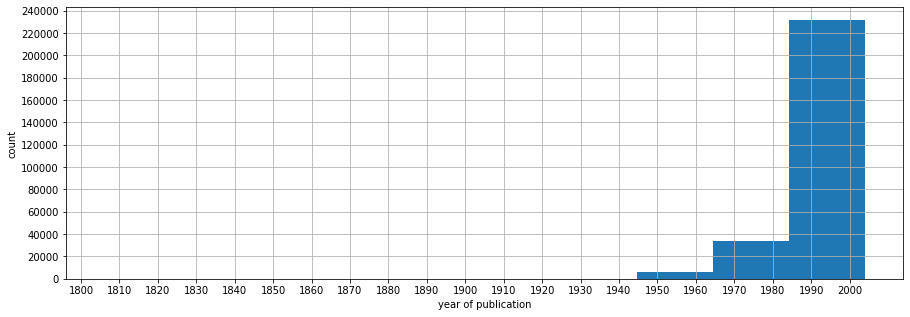

In [51]:
# Histogram of yearOfPublication
books['yearOfPublication'].hist(figsize=(15,5))
plt.xticks(range(1800,2010,10 ))
plt.yticks(range(0,250000,20000))
plt.ylabel('count')
plt.xlabel('year of publication')

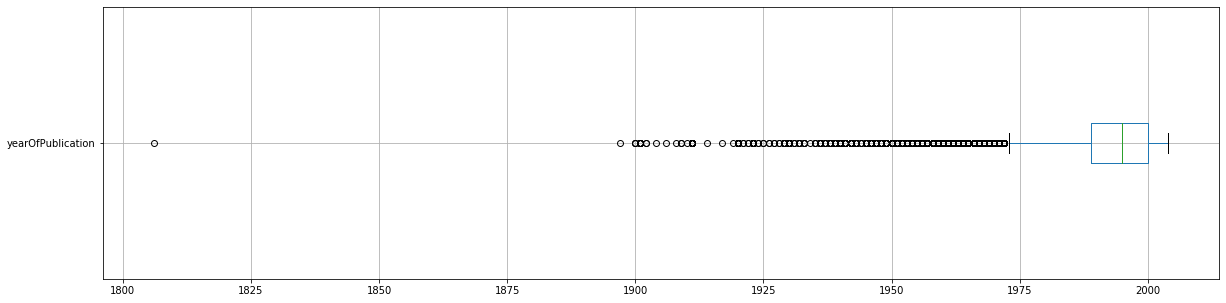

In [52]:
books.boxplot(column='yearOfPublication',vert=False,figsize=(20,5))

In [53]:
# total number of unique bookTitle
len(books['bookTitle'].unique())

242135

In [54]:
# Number of example for each bookTitle
pub=books['bookTitle'].value_counts()
pub

Selected Poems                                          27
Little Women                                            24
Wuthering Heights                                       21
Dracula                                                 20
The Secret Garden                                       20
                                                        ..
A Gambler's Magic (Heartspell)                           1
JACK IN BOX                                              1
MY DARLING MELISSA                                       1
Copper Crown (Plume Contemporary Fiction)                1
The Leap of the Deer: Memories of a Celtic Childhood     1
Name: bookTitle, Length: 242135, dtype: int64

In [55]:
# Top 10 bookTitle
label=pub.index.tolist()[:10]

([<matplotlib.patches.Wedge at 0x249ee534348>,
 [Text(1.006273245548683, 0.4443131275271083, 'Selected Poems'),
  Text(0.39736578620075114, 1.0257194703997088, 'Little Women'),
  Text(-0.34957061467346645, 1.0429766945415486, 'Wuthering Heights'),
  Text(-0.897816641803129, 0.6355511605695894, 'Dracula'),
  Text(-1.0999999999999974, -7.724207464605884e-08, 'The Secret Garden'),
  Text(-0.8978165525462292, -0.6355512866590738, 'Adventures of Huckleberry Finn'),
  Text(-0.38152320181474636, -1.031717037989111, 'Jane Eyre'),
  Text(0.23532650347492678, -1.0745331250186128, 'Pride and Prejudice'),
  Text(0.7657474337057669, -0.7897030250499438, 'The Night Before Christmas'),
  Text(1.0625184466801036, -0.2847008086825535, 'Great Expectations')],
 [Text(0.5488763157538269, 0.24235261501478628, '13.2%'),
  Text(0.21674497429131878, 0.5594833474907501, '11.8%'),
  Text(-0.19067488073098168, 0.5688963788408447, '10.3%'),
  Text(-0.48971816825625214, 0.34666426940159417, '9.8%'),
  Text(-0.5999

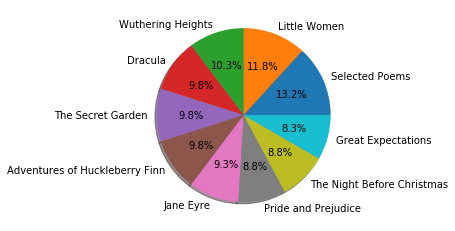

In [56]:
# Plot top 10 bookTitle
plt.pie(pub.head(10), labels=label, autopct='%1.1f%%', shadow=True)

# USERS DATASET 

## DATA CLEANING ( USERS )

In [57]:
# Viewing data
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [58]:
# Users's dimension
users.shape

(278858, 3)

In [59]:
# Renaming user's column
users.columns=['User_id','Location','Age']

In [60]:
# Users's descrition
users.describe()

,User_id,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [61]:
# User_id uniqueness
users['User_id'].is_unique

True

In [62]:
# Types of users's column
users.dtypes

User_id       int64
Location     object
Age         float64
dtype: object

In [63]:
# total null data 
users.isna().sum()

User_id          0
Location         0
Age         110762
dtype: int64

In [64]:
# Occurence for each age 
users['Age'].value_counts()

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
175.0       1
118.0       1
156.0       1
159.0       1
138.0       1
Name: Age, Length: 165, dtype: int64

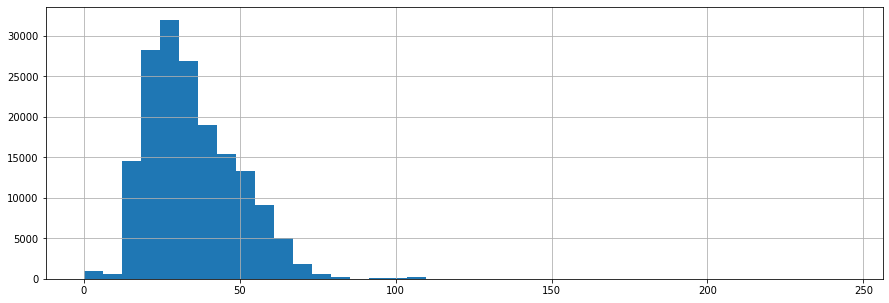

In [65]:
# Age's histogramm
users['Age'].hist(bins=40,figsize=(15,5))

In [66]:
# data which has nan age 
users[users['Age'].isna()]

,User_id,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [67]:
# Extracting index of data having age =nan , > 90 , < 5 which will not useful for madeling 
a=users[users['Age'].isna()].index.tolist()
b=users[users['Age']<5].index.tolist()
c=users[users['Age']>90].index.tolist()

In [68]:
# list containing index of incorrected age 
l=a+b+c
len(l)

112074

In [69]:
# Mean of ages
m=round(users['Age'].mean())
m

35

In [70]:
for i in l:
    users.loc[i,'Age']=m

In [71]:
users.isna().sum()

User_id     0
Location    0
Age         0
dtype: int64

In [72]:
users['Age']=users['Age'].astype(int)

In [73]:
users.dtypes

User_id      int64
Location    object
Age          int32
dtype: object

In [74]:
users.describe()

,User_id,Age
count,278858.00000,278858.000000
mean,139429.50000,34.834830
std,80499.51502,10.507639
min,1.00000,5.000000
25%,69715.25000,29.000000
50%,139429.50000,35.000000
75%,209143.75000,35.000000
max,278858.00000,90.000000


## DATA VISUALIZATION ( USERS )  

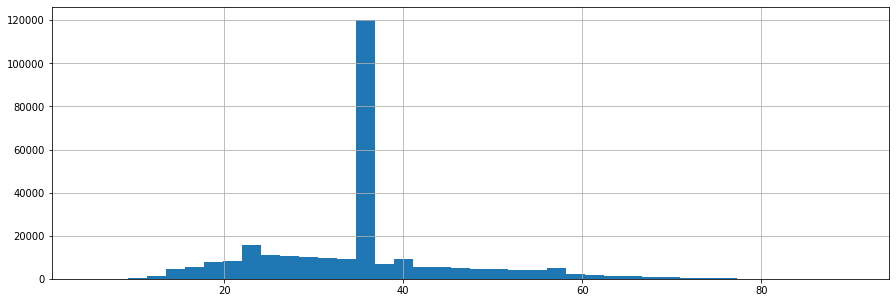

In [75]:
# Age's histogramm
users['Age'].hist(bins=40,figsize=(15,5))

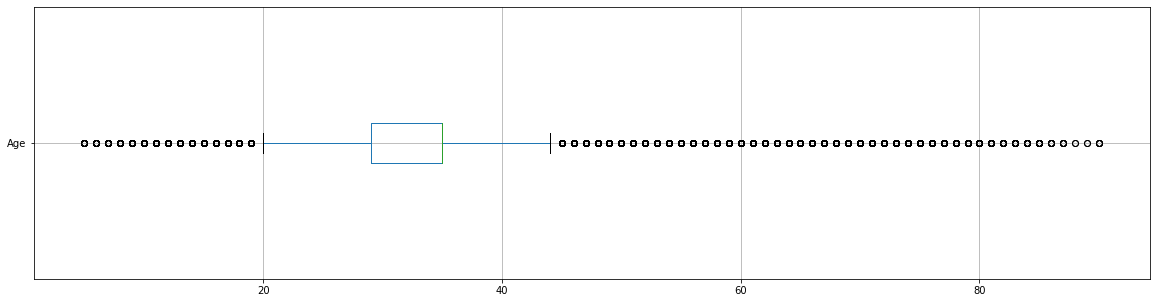

In [76]:
# Age's boxplot
users.boxplot(column='Age',vert=False,figsize=(20,5))

In [77]:
# Occurence for top 10 location
loc=users['Location'].value_counts().head(10)

In [78]:
# Top 10 location 
label=loc.index.tolist()[:10]

([<matplotlib.patches.Wedge at 0x249f7cfd908>,
 [Text(0.9843626058572372, 0.49094832741333333, 'london, england, united kingdom'),
  Text(0.25090656622538693, 1.0710022852566587, 'toronto, ontario, canada'),
  Text(-0.5343331914719642, 0.9615030111712523, 'sydney, new south wales, australia'),
  Text(-1.0015630567335718, 0.4548312251665493, 'melbourne, victoria, australia'),
  Text(-1.0802494845248003, -0.20751156879534152, 'portland, oregon, usa'),
  Text(-0.7879811924344292, -0.7675191465817743, 'chicago, illinois, usa'),
  Text(-0.26452875876883153, -1.0677193150749973, 'seattle, washington, usa'),
  Text(0.3162327360670239, -1.053563883511372, 'new york, new york, usa'),
  Text(0.7971343082707989, -0.7580085056103494, 'madrid, madrid, spain'),
  Text(1.0655605267382424, -0.27309478914347596, 'vancouver, british columbia, canada')],
 [Text(0.5369250577403112, 0.26778999677090903, '14.7%'),
  Text(0.1368581270320292, 0.5841830646854502, '13.2%'),
  Text(-0.2914544680756168, 0.5244561

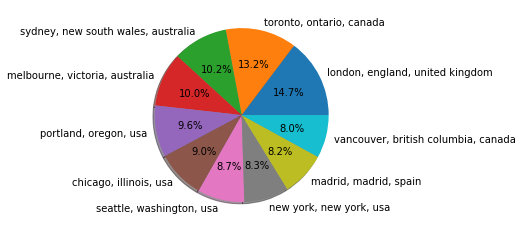

In [79]:
# Plot top 10 location
plt.pie(loc, labels=label, autopct='%1.1f%%', shadow=True)

# RATINGS DATASET 

## DATA CLEANING ( RATINGS )

In [80]:
# Viewing the first rows for ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [81]:
# ratings's dimension
ratings.shape

(1149780, 3)

In [82]:
# Types of ratings's columns
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [83]:
# Renaming ratings's column
ratings.columns=['User_id','ISBN','bookRating']

In [84]:
# ratings's description
ratings.describe()

,User_id,bookRating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [85]:
# total nmber of null data 
ratings.isna().sum()

User_id       0
ISBN          0
bookRating    0
dtype: int64

## DATA VISUALIZATION ( RATINGS )

In [86]:
# top 10 users rate books (include not rated books)
topuser=ratings['User_id'].value_counts().index.tolist()[:10]
topuser

[11676, 198711, 153662, 98391, 35859, 212898, 278418, 76352, 110973, 235105]

In [87]:
# how much every user rates a book (include not rated books)
ratings['User_id'].value_counts().head(10)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: User_id, dtype: int64

In [88]:
# All data for top 10 users (include not rated books)
topu=ratings.loc[ratings['User_id'].isin(topuser)]
topu

,User_id,ISBN,bookRating
4330,278418,0006128831,0
4331,278418,0006542808,5
4332,278418,0020209606,0
4333,278418,0020418809,0
4334,278418,0020420900,0
...,...,...,...
977640,235105,394700023,0
977641,235105,39483786X,0
977642,235105,394847741,0
977643,235105,8471690209,0


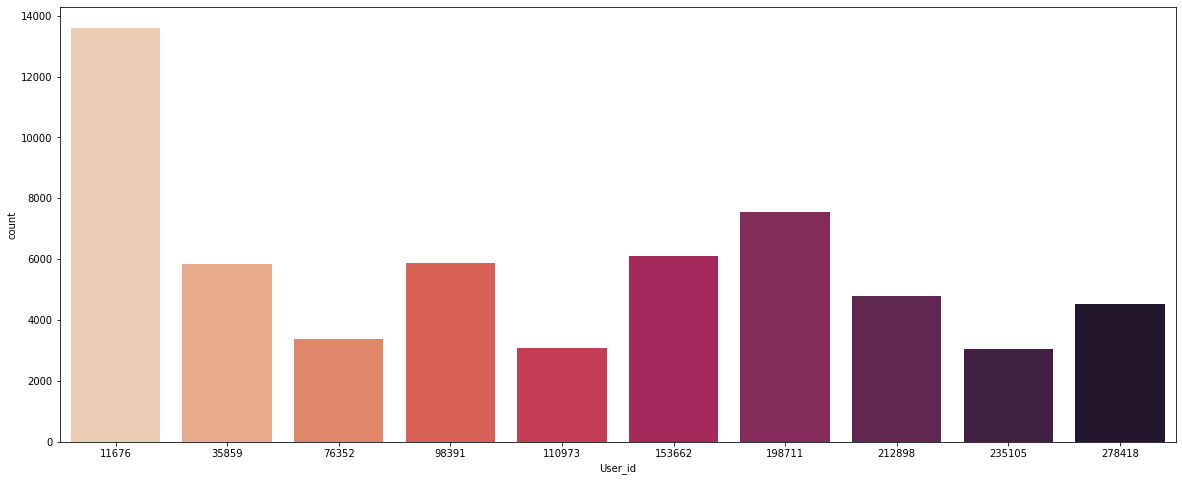

In [89]:
# Plot top 10 users (include not rated books)
plt.figure(figsize=(20,8))
sns.countplot(data=topu , x='User_id', palette='rocket_r')

In [90]:
# Most 10 book rated (include not rated books)
topbook=ratings['ISBN'].value_counts().index.tolist()[:10]
topbook

['0971880107',
 '0316666343',
 '0385504209',
 '0060928336',
 '0312195516',
 '044023722X',
 '0679781587',
 '0142001740',
 '067976402X',
 '0671027360']

In [91]:
# How much time every book was rated (include not rated books)
ratings['ISBN'].value_counts().head(10)

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: ISBN, dtype: int64

In [92]:
# All data for top 10 book most rated (include not rated books)
topb=ratings[ratings['ISBN'].isin(topbook)]
topb=topb.merge(books,on='ISBN')
topb

,User_id,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,277195,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,277413,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
3,277427,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
4,277439,0316666343,7,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
...,...,...,...,...,...,...,...
8592,275357,0060928336,8,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
8593,275638,0060928336,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
8594,275922,0060928336,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
8595,275970,0060928336,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


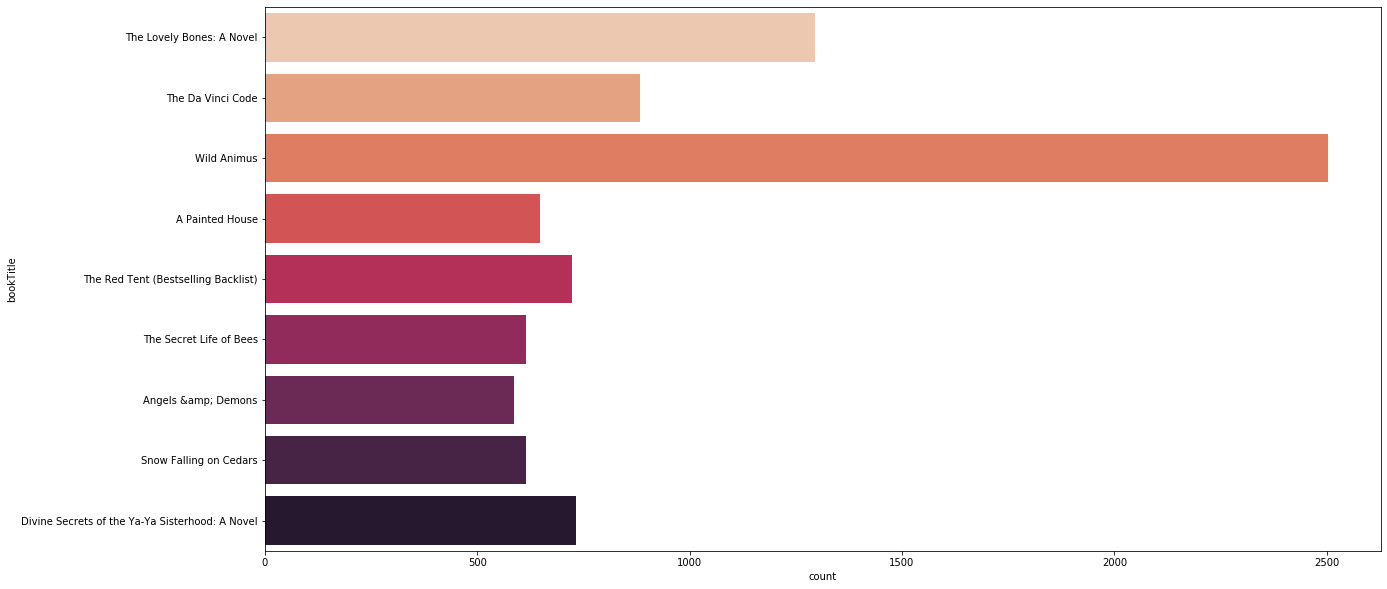

In [93]:
# Plot top 10 books (include not rated books)
plt.figure(figsize=(20,10))
sns.countplot(data=topb , y='bookTitle', palette='rocket_r')

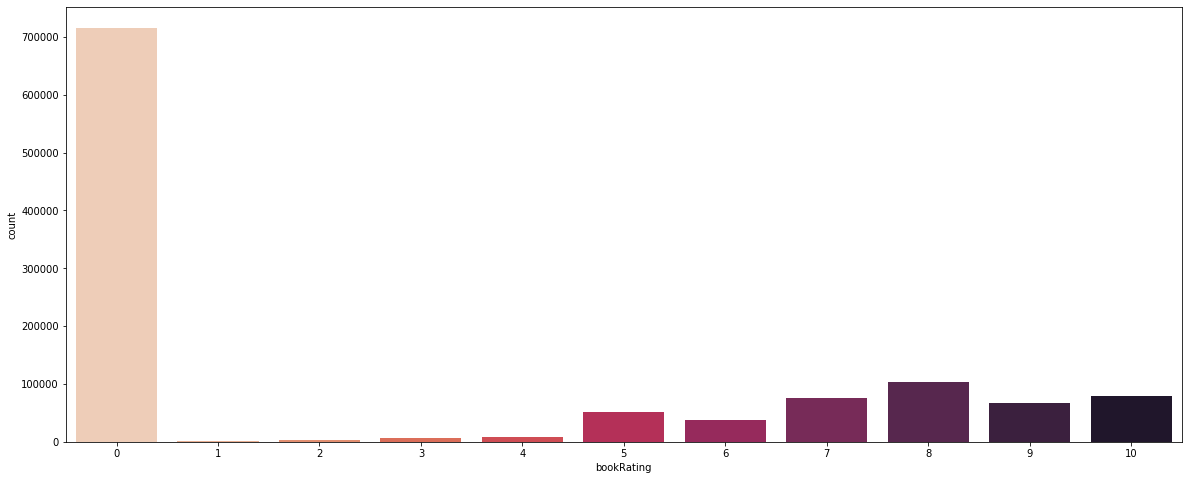

In [94]:
# Plot book's rating (include not rated books)
plt.figure(figsize=(20,8))
sns.countplot(data=ratings , x='bookRating', palette='rocket_r')

In [95]:
# Select data from ratings which exist in books 
ratebook=ratings[ratings['ISBN'].isin(books['ISBN'])]

In [96]:
# Select data from ratings which exist in users
rateuser=ratings[ratings['User_id'].isin(users['User_id'])]

In [97]:
# datasets's dimensions
print('books s dimension : '+ str(books.shape))
print('users s dimension : '+ str(users.shape))
print('ratings s dimension : '+ str(ratings.shape))
print('ratebook s dimension : '+ str(ratebook.shape))
print('rateuser s dimension : '+ str(rateuser.shape))

books s dimension : (271360, 5)
users s dimension : (278858, 3)
ratings s dimension : (1149780, 3)
ratebook s dimension : (1031136, 3)
rateuser s dimension : (1149780, 3)


In [98]:
# verufying that datasets ratings and rateuser are the same
ratings==rateuser

,User_id,ISBN,bookRating
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
1149775,True,True,True
1149776,True,True,True
1149777,True,True,True
1149778,True,True,True


In [99]:
# It's seen that many book's ISBN didn't exist in books dataset however all users in ratings dataset are in users dataset
# Consequently we will go with ratebook dataset to build books recommended system

In [100]:
# Books not rated are got rate = 0 and others are rated from 1 to 10 so we will work with rated books:
bookrated=ratebook[ratebook['bookRating']!=0]
bookrated

,User_id,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
...,...,...,...
1149771,276704,0743211383,7
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10


In [101]:
# Verifying that all book are rated 
bookrated[bookrated['bookRating']==0]

,User_id,ISBN,bookRating


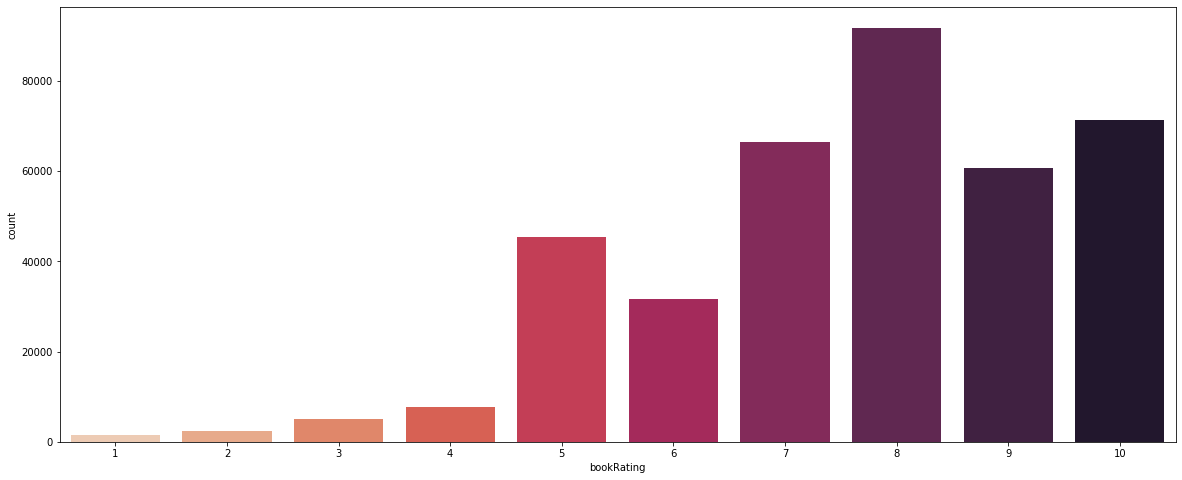

In [102]:
# Plot books's rates
plt.figure(figsize=(20,8))
sns.countplot(data=bookrated , x='bookRating', palette='rocket_r')

In [103]:
# top 10 users rate books 
topuser=bookrated['User_id'].value_counts().index.tolist()[:10]
topuser

[11676, 98391, 189835, 153662, 23902, 235105, 76499, 171118, 16795, 248718]

In [104]:
# how much every user rates a book
bookrated['User_id'].value_counts().head(10)

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
Name: User_id, dtype: int64

In [105]:
# All data for top 10 users 
topu=bookrated.loc[bookrated['User_id'].isin(topuser)]
topu

,User_id,ISBN,bookRating
45339,11676,0001944711,6
45340,11676,0002005018,8
45341,11676,0002118580,9
45342,11676,0002176432,5
45343,11676,0002184974,7
...,...,...,...
1040385,248718,1891400274,8
1040386,248718,1892123029,10
1040387,248718,1892881268,10
1040388,248718,2843231523,9


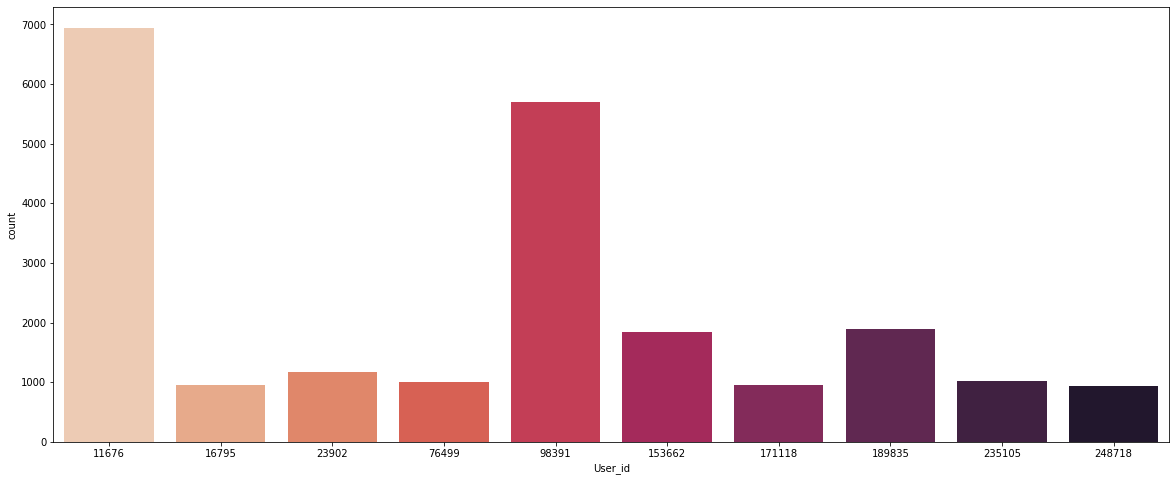

In [106]:
# Plot top 10 users
plt.figure(figsize=(20,8))
sns.countplot(data=topu , x='User_id', palette='rocket_r')

In [107]:
# Most 10 rated book (number of time is rated)
topbook=bookrated['ISBN'].value_counts().index.tolist()[:10]
topbook

['0316666343',
 '0971880107',
 '0385504209',
 '0312195516',
 '0060928336',
 '059035342X',
 '0142001740',
 '0446672211',
 '044023722X',
 '0452282152']

In [108]:
# Number of time every book was rated 
bookrated['ISBN'].value_counts().head(10)

0316666343    707
0971880107    581
0385504209    487
0312195516    383
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
0452282152    278
Name: ISBN, dtype: int64

In [109]:
# All data for most 10 rated book 
topb=bookrated[bookrated['ISBN'].isin(topbook)]
topb=topb.merge(books,on='ISBN')
topb

,User_id,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday
1,277427,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday
2,638,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday
3,882,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday
4,1075,0385504209,7,The Da Vinci Code,Dan Brown,2003,Doubleday
...,...,...,...,...,...,...,...
3947,274017,0060928336,8,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
3948,274380,0060928336,8,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
3949,274466,0060928336,6,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
3950,275357,0060928336,8,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


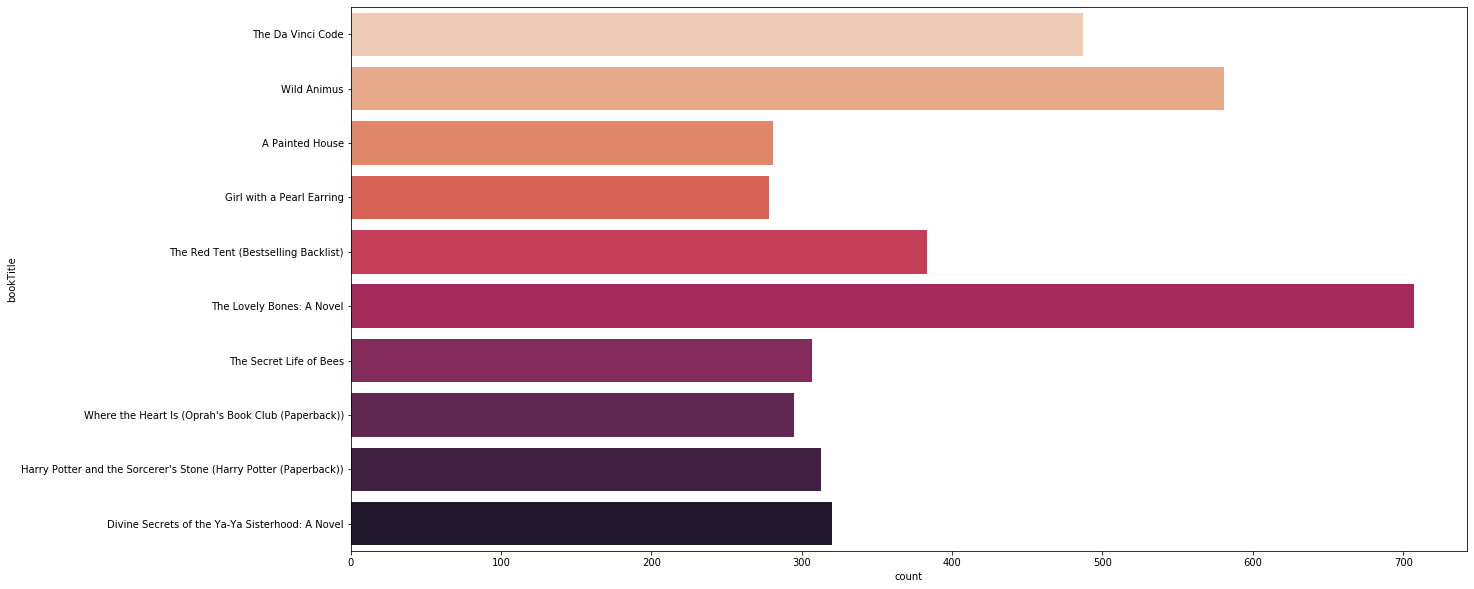

In [110]:
# Plot most 10 rated books (number of time is rarted)
plt.figure(figsize=(20,10))
sns.countplot(data=topb , y='bookTitle', palette='rocket_r')

# RECOMMENDATION SYSTEMS 

## Popularity-Based Recommendation System 

#### Popularity-Based Recommendation System : It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or books which are in trend or are most popular among the users and directly recommend those.This recommendation model is recommended to the new website's visitors

In [111]:
# Creating recommendation model based on sum of rates for each book 
sumratings = pd.DataFrame(bookrated.groupby(['ISBN'])['bookRating'].sum())
top10 = sumratings.sort_values('bookRating', ascending = False).head(10)

top10book=top10.merge(books, left_index = True, right_on = 'ISBN')
top10book

,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


<BarContainer object of 10 artists>

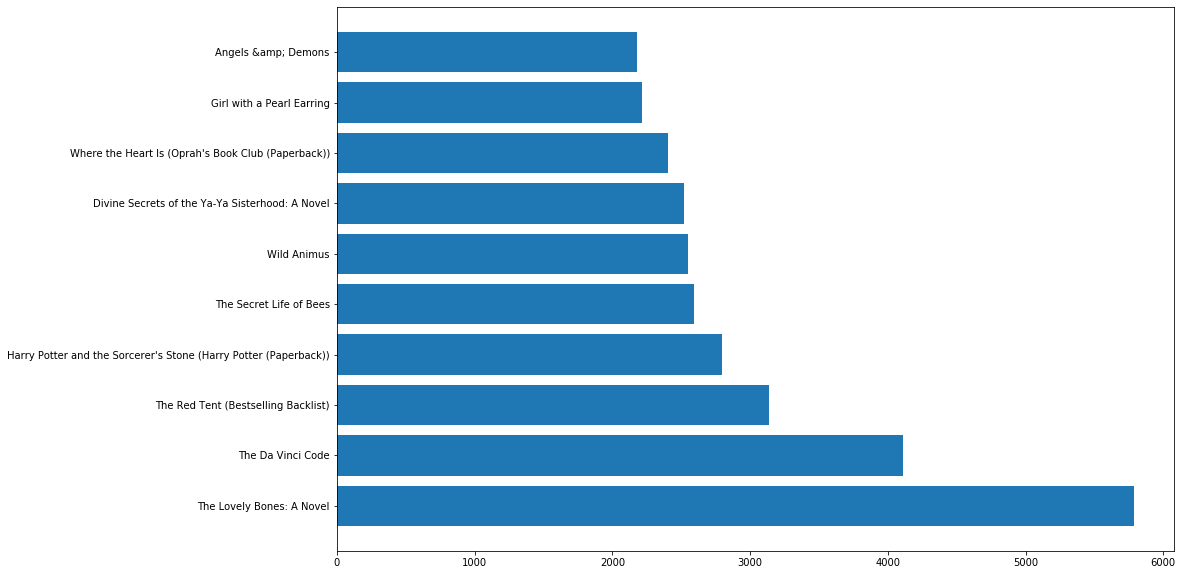

In [112]:
# plot top 10 rated book 
plt.figure(figsize=(15,10))
plt.barh(top10book['bookTitle'],top10book['bookRating'],align='center')

## Collaborative Filtering recommendation system

#### Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). If there is user A who has read and liked x and y books, And user B has also liked this two books and now user A has read and liked z book which is not read by B so we have to recommend z book to user B

In [113]:
# We will extract the user ids who have given more than 100 ratings and when we will have user ids we will extract 
#the ratings of only this user id from the rating dataframe.
x = bookrated['User_id'].value_counts() > 100
y = x[x].index  
rating = bookrated[bookrated['User_id'].isin(y)]
print(rating.shape)

(102371, 3)


In [114]:
# Merging ratings with books on basis of ISBN so that we will get the rating of each user on each book id
rating_with_books = rating.merge(books, on='ISBN')
rating_with_books.head()

,User_id,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,52584,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,110934,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [115]:
# Number of ratings for every book
number_rating = rating_with_books.groupby('bookTitle')['bookRating'].count().reset_index()
number_rating.rename(columns= {'bookRating':'number_of_ratings'}, inplace=True)
number_rating.sort_values('number_of_ratings', ascending = False)

,bookTitle,number_of_ratings
20267,Harry Potter and the Chamber of Secrets (Book 2),71
49567,The Lovely Bones: A Novel,70
7486,Bridget Jones's Diary,64
20283,Harry Potter and the Prisoner of Azkaban (Book 3),56
20273,Harry Potter and the Goblet of Fire (Book 4),53
...,...,...
23235,Information Anxiety,1
23236,Information Architecture for the World Wide We...,1
23237,Informe Sobre La Tierra: Fundamentalmente in,1
23238,Informed Consent,1


In [116]:
# We create a dataset with that user who has rated more than 100 books and books that received
#more than 50 ratings
final_rating = rating_with_books.merge(number_rating, on='bookTitle')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 20]
final_rating.drop_duplicates(['User_id','bookTitle'], inplace=True)

In [117]:
# Final dataset for the recommendation model
final_rating

,User_id,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,number_of_ratings
29,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,22
30,6251,0061009059,7,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,22
31,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,22
32,8067,0061009059,10,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,22
33,11676,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,22
...,...,...,...,...,...,...,...,...
42713,274061,0451176464,10,Gerald's Game,Stephen King,2001,Signet Book,26
42714,102359,0670846503,10,Gerald's Game,Stephen King,1992,Penguin Putnam~childrens Hc,26
42715,140358,0670846503,5,Gerald's Game,Stephen King,1992,Penguin Putnam~childrens Hc,26
42716,236283,0670846503,10,Gerald's Game,Stephen King,1992,Penguin Putnam~childrens Hc,26


In [118]:
# Creating pivot table where columns are users ids and indexs are books's title and values are ratings
# and the user id who has not rated any book will have value as NAN so impute it with zero.
book_pivot = final_rating.pivot_table(columns='User_id', index='bookTitle', values="bookRating")
book_pivot.fillna(0, inplace=True)
book_pivot

User_id,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427
bookTitle,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Oleander : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
White Oleander : A Novel (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wicked: The Life and Times of the Wicked Witch of the West,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,10.0,9.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Converting the pivot table to the sparse matrix to save a significant amount of
# memory and speed up the processing of that data
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [120]:
# Training the nearest neighbors algorithm : here we need to
# specify an algorithm which is brute means find the distance of every point to every other point.
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [121]:
# let's pick out a book title to find its nearest neighbours
book_pivot.index[1]

'2nd Chance'

In [122]:
# Creating function which return book's index
def bookindex (book):
    for i in range(book_pivot.shape[0]):
        if book_pivot.index[i]==book:
            ind=i
    return (ind) 

In [123]:
# book index
x=bookindex('Wild Animus')
x

183

In [124]:
# Making predictions for suggested books
distances, suggestions = model.kneighbors(book_pivot.iloc[x, :].values.reshape(1, -1))

In [125]:
# Print recommended books
booklist=[]
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])
    booklist.append(book_pivot.index[suggestions[i]])
    

Index(['Wild Animus', 'The Reader', 'Blue Diary', 'The Tao of Pooh',
       'How to Be Good'],
      dtype='object', name='bookTitle')


In [126]:
# Extracting book from recommended books  
booklist[0][4]

'How to Be Good'

In [127]:
# Distances between books
distances

array([[ 0.        , 36.7151195 , 38.27531842, 38.28837944, 38.75564475]])

## Correlations-based recommendation system

#### Pearson’s Correlation Coefficient is a very simple yet effective way to find how 1 variable linearly changes with respect to another. we can use this to our advantage and build a recommender system with this concept . We use Pearsons’R correlation coefficient to measure linear correlation between two variables, in our case, the ratings for two books.


In [128]:
# Creating dataset with average rating, and the number of ratings each book received.
average_rating=pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingcount']=ratings.groupby('ISBN')['bookRating'].count()
average_rating.sort_values('ratingcount',ascending=False).head(10)

,bookRating,ratingcount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
044023722X,3.187017,647
0679781587,4.381847,639
0142001740,4.219512,615
067976402X,3.255700,614


In [129]:
# Creating pivot table (matrix)
ratings_pivot=final_rating.pivot(index='User_id',columns='ISBN',values='bookRating')
ratings_pivot.head()

ISBN,0001047973,0060094818,0060283122,0060392452,0060541830,0060809833,0060830956,0060915544,0060928336,0060929871,...,1852865024,1878448900,1896095011,3442451221,555053150X,8401491029,9506440298,B00001U0CP,B00006I4OX,B00009EF82
User_id,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Find similar books to book example based on pearsons'R correlation between ratings
bookexp=ratings_pivot['0316666343'] # 'The Lovely Bones: A Novel' book
similartobook=ratings_pivot.corrwith(bookexp)
corr_books=pd.DataFrame(similartobook,columns=['pearsonR'])
corr_books.dropna(inplace=True)
corr_books=corr_books.join(average_rating['ratingcount'])
corr_books[corr_books['ratingcount']>300].sort_values('pearsonR',ascending=False).head(10)

C:\Users\hamdi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hamdi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingcount
ISBN,,
0316666343,1.000000,1295
0440225701,1.000000,379
0440222656,1.000000,420
0446606812,0.981981,369
0440206154,0.942809,365
0452282152,0.891902,526
0345313860,0.845222,301
0060928336,0.818182,732
0380789035,0.804030,302


In [131]:
# Joining books's informations
corr_books=corr_books.merge(books,on='ISBN')

In [132]:
# Dropping out duplicates columns and renaming them
corr_books=corr_books.T.drop_duplicates().T
corr_books.columns=['ISBN','pearsonR','ratingcount','bookTitle','bookAuthor','yearOfPublication','publisher']

In [133]:
# Books recommended 
corr_books=corr_books[corr_books['pearsonR']>0.7]
corr_books=corr_books[corr_books['ratingcount']>300]
corr_books.sort_values('pearsonR',ascending=False)

,ISBN,pearsonR,ratingcount,bookTitle,bookAuthor,yearOfPublication,publisher
35,0316666343,1,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
120,0440225701,1,379,The Street Lawyer,JOHN GRISHAM,1999,Dell
118,0440222656,1,420,The Horse Whisperer,Nicholas Evans,1996,Dell
135,0446606812,0.981981,369,Message in a Bottle,Nicholas Sparks,1999,Warner Vision
108,0440206154,0.942809,365,Red Dragon,Thomas Harris,2000,Dell Publishing Company
165,0452282152,0.891902,526,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
42,0345313860,0.845222,301,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,1986,Ballantine Books
2,0060928336,0.818182,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
65,0380789035,0.80403,302,American Gods,Neil Gaiman,2002,HarperTorch
124,044023722X,0.763763,647,A Painted House,John Grisham,2001,Dell Publishing Company


# CHATBOT

#### A chatbot is a software or computer program that simulates human conversation or "chatter" through text or voice interactions.Users in both business-to-consumer and business-to-business environments increasingly use chatbot virtual assistants to handle simple tasks. Adding chatbot assistants reduces overhead costs, uses support staff time better and enables organizations to provide customer service during hours when live agents aren't available.

In [134]:
# Import libraries for chatting
from nltk.chat.util import Chat , reflections

In [135]:
# Making all books title having recommended books into list 
list_of_book=list(book_pivot.index)
list_of_book

['1st to Die: A Novel',
 '2nd Chance',
 '84 Charing Cross Road',
 'A Bend in the Road',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'A Painted House',
 'A Prayer for Owen Meany',
 'A Time to Kill',
 'A Walk to Remember',
 'A Wrinkle In Time',
 'A Wrinkle in Time',
 'All I Really Need to Know',
 'American Gods',
 "Angela's Ashes: A Memoir",
 'Angels &amp; Demons',
 'Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
 'B Is for Burglar (Kinsey Millhone Mysteries (Paperback))',
 'Balzac and the Little Chinese Seamstress : A Novel',
 'Bel Canto: A Novel',
 'Black House',
 'Blue Diary',
 'Brave New World',
 "Bridget Jones's Diary",
 'Bridget Jones: The Edge of Reason',
 'C Is for Corpse (Kinsey Millhone Mysteries (Paperback))',
 'Carrie',
 "Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))",
 'Christine',
 'Confessions of a Shopaholic (Summer Display Opportunity)',
 'Congo',
 'Coraline',
 'Cradle and All',
 'Cruel &amp; Unusual (Kay S

In [144]:
# Creating chatting list containing the inputs and for each input the bot's responses
pairs=[
    ['(hi|hello|hey|hola)',['Hey there','Hello my friend','Hiii']],
    ['how are you',['i m fine ','so good']],
    ['who are you',['I am a chatbot who help users find books that they may like by giving them suggestions. And you what is your name ? ']],
    ['my name is (.*)',['Nice to meet you %1, how are you ?']],
    ['(fine|im fine)',['Good !, so are you looking for recommended books ?','Happy to hear this from you my friend , so are you looking for recommended books ?']],
    ['(yes|ofcourse)',['Great !, and i m here for this job. So tell me, are you a new visitor or you have read some books ?']],
    ['(.*) read (.*) books',['Very nice ! and what is the latest book title did you read ?']],
    ['(thank you chatbot|thanks|thats great|good job)',['You are welcome, happy to help you','Thats my job']],
    ['(good bye (.*)|bye (.*))',['Good bye','Bye , See you soon']]
]

In [145]:
# Adding the books and their recommendations to the chatting list
for b in list_of_book:
    l=[]
    l.append(b)
    x=bookindex(b)
    distances, suggestions = model.kneighbors(book_pivot.iloc[x, :].values.reshape(1, -1))
    booklist=[]
    bookl=[]
    ch=' Very interesting book and I think that you may also like these books :  '
    for i in range(len(suggestions)):
        booklist.append(book_pivot.index[suggestions[i]])
    for j in range(1,len(booklist[0])):
        ch+=booklist[0][j]
        ch+=' , '
    bookl.append(ch)
    l.append(bookl)
    pairs.append(l)

In [146]:
# How much popular books are they recommended for new visitors
n=len(top10book['bookTitle'].tolist())
n

10

In [147]:
# Adding top popular books to the chatting list
l=['(.*) new visitor']
bookl=[]
ch='You are welcome, these are most popular book that users rate and you may also need to read them : '
for i in range(n):
    ch+=top10book['bookTitle'].tolist()[i]
    ch+=' , '
bookl.append(ch)
l.append(bookl)
pairs.append(l)

In [148]:
# Viewing the final chatting list : all the possible inputs and their possible 
# outputs (or bot's responses)
pairs

[['(hi|hello|hey|hola)', ['Hey there', 'Hello my friend', 'Hiii']],
 ['how are you', ['i m fine ', 'so good']],
 ['who are you',
  ['I am a chatbot who help users find books that they may like by giving them suggestions. And you what is your name ? ']],
 ['my name is (.*)', ['Nice to meet you %1, how are you ?']],
 ['(fine|im fine)',
  ['Good !, so are you looking for recommended books ?',
   'Happy to hear this from you my friend , so are you looking for recommended books ?']],
 ['(yes|ofcourse)',
  ['Great !, and i m here for this job. So tell me, are you a new visitor or you have read some books ?']],
 ['(.*) read (.*) books',
  ['Very nice ! and what is the latest book title did you read ?']],
 ['(thank you chatbot|thanks|thats great|good job)',
  ['You are welcome, happy to help you', 'Thats my job']],
 ['(good bye (.*)|bye (.*))', ['Good bye', 'Bye , See you soon']],
 ['1st to Die: A Novel',
  [' Very interesting book and I think that you may also like these books :  The Beach Ho

In [149]:
# Making conversation with the bot and see how does it intereact
chat=Chat(pairs,reflections)
chat.converse()

>hi
Hello my friend
>how are you
i m fine 
>who are you
I am a chatbot who help users find books that they may like by giving them suggestions. And you what is your name ? 
>hamdi
None
>my name is hamdi
Nice to meet you hamdi, how are you ?
>i m fine
None
>im fine 
Good !, so are you looking for recommended books ?
>yes
Great !, and i m here for this job. So tell me, are you a new visitor or you have read some books ?
>im new visitor
You are welcome, these are most popular book that users rate and you may also need to read them : The Lovely Bones: A Novel , The Da Vinci Code , The Red Tent (Bestselling Backlist) , Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) , The Secret Life of Bees , Wild Animus , Divine Secrets of the Ya-Ya Sisterhood: A Novel , Where the Heart Is (Oprah's Book Club (Paperback)) , Girl with a Pearl Earring , Angels &amp; Demons , 
>i have read some books
Very nice ! and what is the latest book title did you read ?
>Coraline
 Very interesting book

IndexError: string index out of range